## Using lstm in nlp

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
import matplotlib.pyplot as plt

In [2]:
sentence = [
       "I love this product, it works amazingly well!", 
    "This is the worst purchase I've ever made.",  
    "Absolutely fantastic! Highly recommended.", 
    "I regret buying this, totally useless.",  
    "The service was great, very satisfied!", 
    "Terrible quality, broke within a day.",  
    "I'm extremely happy with my experience.", 
    "Horrible experience, would never buy again.",  
    "The staff was so kind and helpful!", 
    "I feel scammed, complete waste of money.",  
]

label = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [3]:
tokenizer =  Tokenizer(num_words=100, oov_token='<OOV>')
tokenizer.fit_on_texts(sentence)

word_index = tokenizer.word_index

sequence = tokenizer.texts_to_sequences(sentence)  

In [4]:
padded_sentence = pad_sequences(sequence, maxlen= 10, padding='post',truncating='post')


In [5]:
## model building

In [6]:
model = Sequential([
    Embedding(input_dim=100, output_dim=16, input_length=10),
    SpatialDropout1D(0.2),
    LSTM(128, return_sequences=True), 
    LSTM(64),
    Dense(128, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 16)            1600      
                                                                 
 spatial_dropout1d (SpatialD  (None, 10, 16)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 10, 128)           74240     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(padded_sentence, label, epochs=30, batch_size=16)

Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6928 - accuracy: 0.7000
Epoch 3/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.7000
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6917 - accuracy: 0.8000
Epoch 5/30
1/1 [==============================] - 0s 62ms/step - loss: 0.6900 - accuracy: 0.8000
Epoch 6/30
1/1 [==============================] - 0s 19ms/step - loss: 0.6897 - accuracy: 0.9000
Epoch 7/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6883 - accuracy: 0.9000
Epoch 8/30
1/1 [==============================] - 0s 32ms/step - loss: 0.6861 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6841 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 21ms/step - loss: 0.6773 - accuracy: 1.0000
Epoch 11/30
1/1 [==============

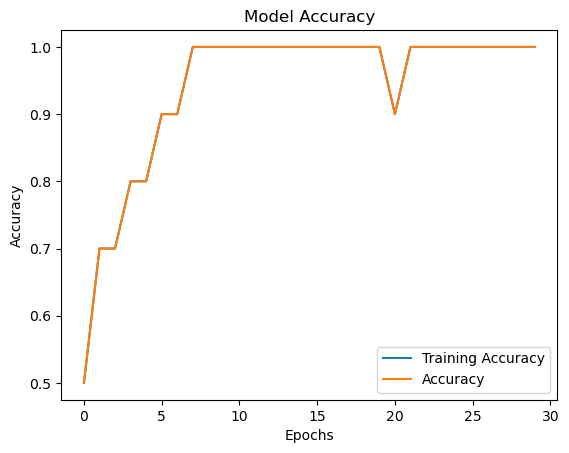

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Using new sentence to see the model accuracy

In [11]:
new_sentence = [
  "I love this product, it's amazing!",
    "This is the worst movie I have ever seen.",
    "The food was great, I really enjoyed it.",
    "I will never buy this again, terrible experience.",
]

In [12]:
new_sequence = tokenizer.texts_to_sequences(new_sentence)

In [13]:
print(new_sequence)

[[2, 7, 3, 8, 1, 1], [3, 13, 4, 14, 1, 2, 1, 17, 1], [4, 1, 5, 28, 2, 1, 1, 9], [2, 1, 44, 45, 3, 46, 31, 6]]


In [14]:
padded_test_sentence = pad_sequences(new_sequence, maxlen=10, padding='post', truncating='post')

In [15]:
prediction = model.predict(padded_test_sentence)

1/1 [==============================] - 1s 1s/step


In [16]:
print(prediction)

[[0.9790839 ]
 [0.00685956]
 [0.98966634]
 [0.00386001]]


In [17]:
predicted_labels = (prediction > 0.5).astype(int)

In [18]:
print(predicted_labels)

[[1]
 [0]
 [1]
 [0]]


In [19]:
print("Label distribution:", np.bincount(label))

Label distribution: [5 5]


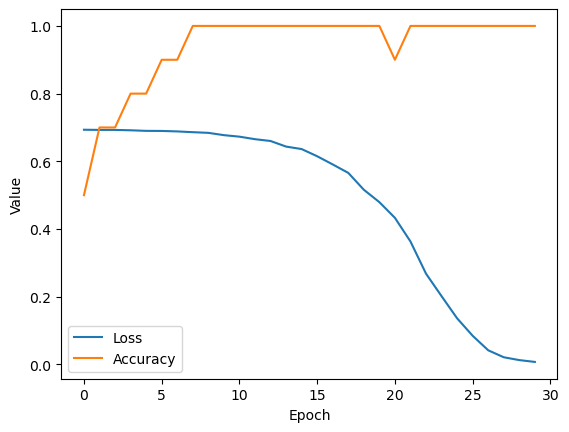

In [20]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()